# Load Packages

In [2]:
# scikit-learn, scikit-image are needed
# If those packages are missed, then, install them by using the following command
# pip install scikit-learn scikit-image

import os

import sklearn.datasets
import sklearn.linear_model
import sklearn.svm
import sklearn.tree
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics

import skimage.io
import skimage.transform
import skimage.color

import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

# Load Additional Packages (if you want to use other modules in Scikit Learn)

In [27]:
# Load additional scikit learn packages! if you need
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

# Load Data Points (Do not modify the following block)

In [28]:
image_size = 64
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

images = []
y = []
for i in labels:
    folderPath = os.path.join('./tumor_dataset/Training',i)
    for j in os.listdir(folderPath):
        img = skimage.io.imread(os.path.join(folderPath,j),)
        img = skimage.transform.resize(img,(image_size,image_size))
        img = skimage.color.rgb2gray(img)
        images.append(img)
        y.append(i)
        
images = np.array(images)

X = images.reshape((-1, image_size**2))
y = np.array(y)

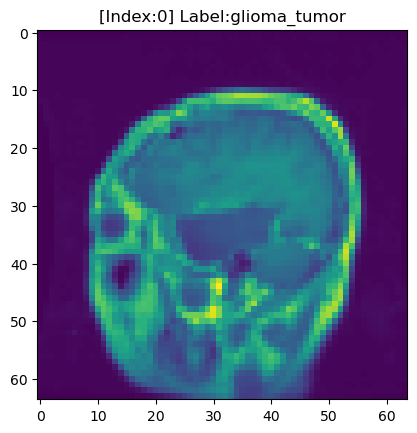

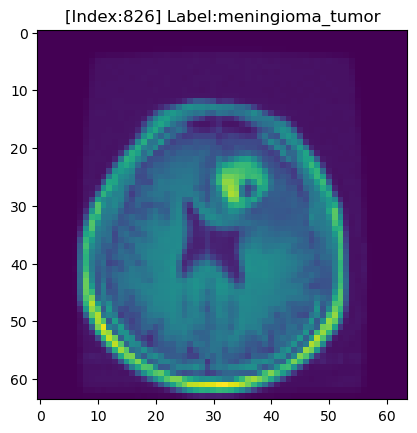

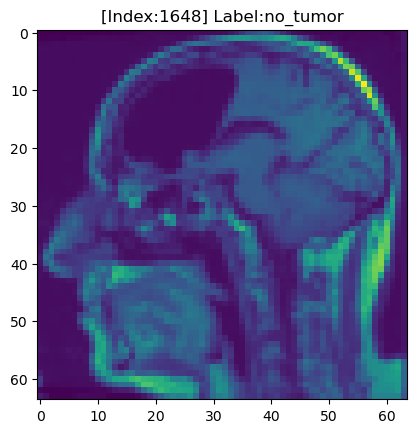

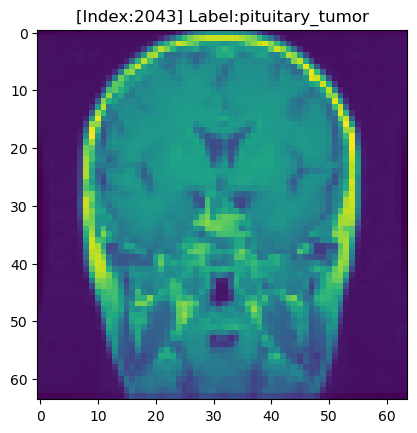

In [29]:
j = 0
for i in range(len(y)):
    if y[i] in labels[j]:
        plt.imshow(images[i])
        plt.title("[Index:{}] Label:{}".format(i, y[i]))
        plt.show()
        j += 1
    if j >= len(labels):
        break

In [30]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

# Classification with Scikit Learn Library (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'X_train' is feature vectors of training dataset
- 'y_train' is target labels of training dataset
- 'X_test' is feature vectors of test dataset
- 'y_test' is target labels of test dataset
- 'y_pred' was initialized as zero vectors and fill 'y_pred' with predicted labels

### Find the best model and hyperparameter for tumor classification
- Find the best random seed as well and fix it to reproduce your result on other computers.

In [33]:
#TODO
#1. Create a classification object in scikit learn package (such as perceptron, logistic regression, or other classification algorithms)
#2. Fit the object to training dataset
#3. Predict the label of test data point (X_test)
# - Do not change the variable name "y_pred"

class1 = RandomForestClassifier(random_state=3, max_depth=22, min_samples_leaf=1, min_samples_split=5, n_estimators=180)
class2 = RandomForestClassifier(random_state=24, max_depth=49, min_samples_leaf=1, min_samples_split=5, n_estimators=222)
class3 = RandomForestClassifier(random_state=57, max_depth=80, min_samples_leaf=1, min_samples_split=5, n_estimators=260)
class4 = ExtraTreesClassifier(random_state = 1000, class_weight = 'balanced')
class5 = ExtraTreesClassifier(random_state = 2000, class_weight = 'balanced', criterion = 'gini')
class6 = ExtraTreesClassifier(random_state = 3000, class_weight = 'balanced', criterion = 'gini')
class7 = ExtraTreesClassifier(random_state = 4000, class_weight = 'balanced', criterion = 'gini', n_estimators = 1000)
class8 = ExtraTreesClassifier(random_state = 3000, class_weight = 'balanced', criterion = 'entropy')
class9 = ExtraTreesClassifier(random_state = 4000, class_weight = 'balanced', criterion = 'entropy', n_estimators = 1000)

vote = VotingClassifier(estimators = [('class1', class1),('class2', class2), ('class3', class3),('class4', class4),('class5', class5),('class6', class6) ,('class7', class7), ('class8', class8), ('class9', class9)], voting='hard')
vote.fit(X_train, y_train)
y_pred = vote.predict(X_test)

### Print accuracy (do not modify the following block)

In [34]:
print('Accuracy: %.2f' % sklearn.metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.93
